In [1]:
import pandas as pd
import numpy as np
import pickle
import shap
import matplotlib.pyplot as plt
from IPython.display import display
from ast import literal_eval
from comparers import ModelComparer
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report
from baseline import print_rules, plot_tree_leafs_for_class
from tasks.cluster_example import make_task
from diro2c_wrapper import CombinationClassifier, ConstantClassifier

In [2]:
clf_a, clf_b, X, y, feature_names = make_task()

In [3]:
comparer = ModelComparer(clf_a, clf_b, feature_names)

# General Explanations

In [4]:
is_pred_diff = comparer.predict_bin_diff(X)
mclass_diff = comparer.predict_mclass_diff(X)
class_names = comparer.class_names

In [10]:
def explain(max_depth=None, tree_fig_size=(28, 14)):
    global tree
    tree = DecisionTreeClassifier(max_depth=max_depth)
    tree.fit(X, mclass_diff)
    
    fig, ax = plt.subplots(figsize=(14, 14))
    plot_tree(tree, feature_names=feature_names, class_names=class_names, ax=ax, node_ids=True, precision=2)
    
    for focus_class in comparer.difference_class_names:
        print(focus_class)
        print_rules(tree, feature_names, class_names, focus_class, X_test=X, y_test=mclass_diff, precision=2)
    
    plot_tree_leafs_for_class(tree, class_names, comparer.difference_class_names, X, mclass_diff, class_names, feature_names)
        
    print('\ndata evaluation:')
    print(classification_report(mclass_diff, tree.predict(X), target_names=class_names))

(0, 1)
(1, 0)

data evaluation:
              precision    recall  f1-score   support

      (0, 0)       0.96      1.00      0.98       524
      (0, 1)       0.00      0.00      0.00        20
      (1, 0)       0.00      0.00      0.00         4
      (1, 1)       0.99      1.00      1.00       476

    accuracy                           0.98      1024
   macro avg       0.49      0.50      0.49      1024
weighted avg       0.95      0.98      0.97      1024



Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


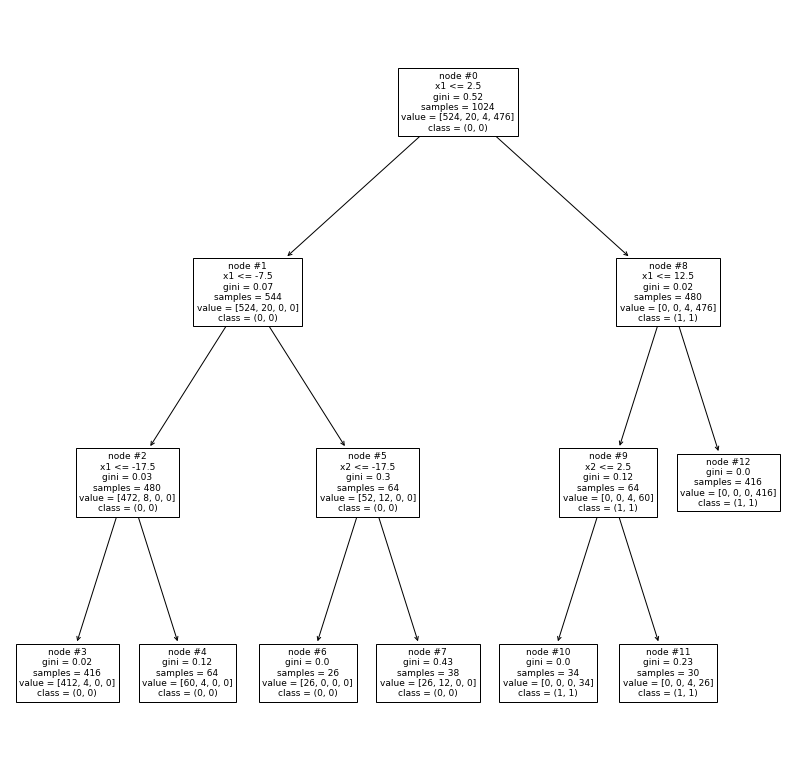

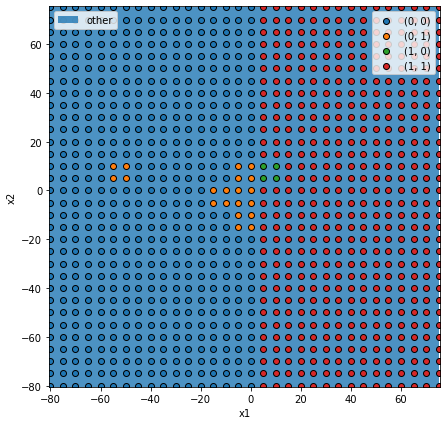

In [11]:
explain(max_depth=3)

(0, 1)
node #12: if (x1 > -7.5) and (x1 <= 2.5) and (x2 > -17.5) and (x2 <= 12.5) then class (0, 1) (covers 1.0 of 12 instances)
(1, 0)
node #18: if (x1 > 2.5) and (x1 <= 12.5) and (x2 > 2.5) and (x2 <= 12.5) then class (1, 0) (covers 1.0 of 4 instances)

data evaluation:
              precision    recall  f1-score   support

      (0, 0)       0.98      1.00      0.99       524
      (0, 1)       1.00      0.60      0.75        20
      (1, 0)       1.00      1.00      1.00         4
      (1, 1)       1.00      1.00      1.00       476

    accuracy                           0.99      1024
   macro avg       1.00      0.90      0.94      1024
weighted avg       0.99      0.99      0.99      1024



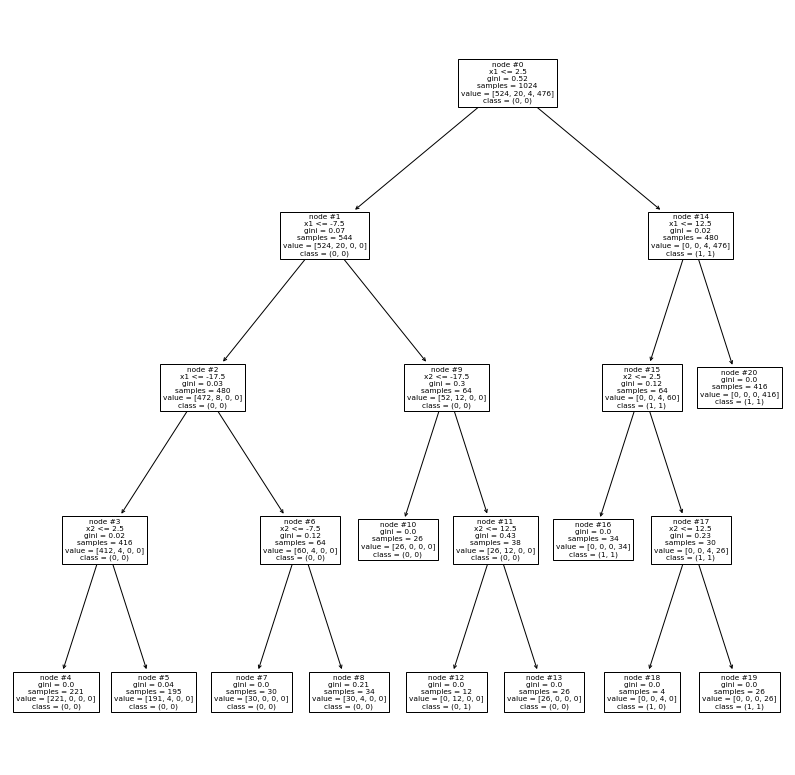

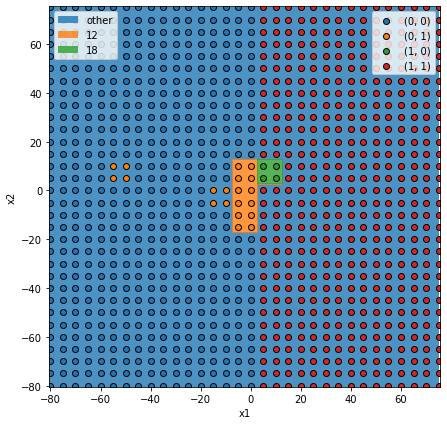

In [12]:
explain(max_depth=4)

(0, 1)
node #16: if (x1 > -7.5) and (x1 <= 2.5) and (x2 > -17.5) and (x2 <= 12.5) then class (0, 1) (covers 1.0 of 12 instances)
node #11: if (x1 > -17.5) and (x1 <= -7.5) and (x2 > -7.5) and (x2 <= 2.5) then class (0, 1) (covers 1.0 of 4 instances)
(1, 0)
node #22: if (x1 > 2.5) and (x1 <= 12.5) and (x2 > 2.5) and (x2 <= 12.5) then class (1, 0) (covers 1.0 of 4 instances)

data evaluation:
              precision    recall  f1-score   support

      (0, 0)       0.99      1.00      1.00       524
      (0, 1)       1.00      0.80      0.89        20
      (1, 0)       1.00      1.00      1.00         4
      (1, 1)       1.00      1.00      1.00       476

    accuracy                           1.00      1024
   macro avg       1.00      0.95      0.97      1024
weighted avg       1.00      1.00      1.00      1024



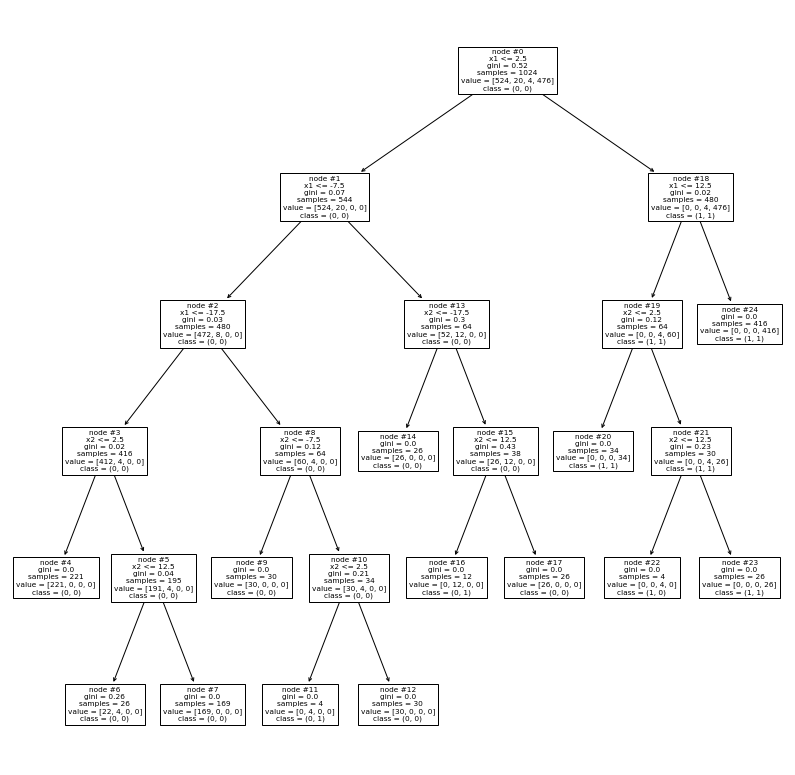

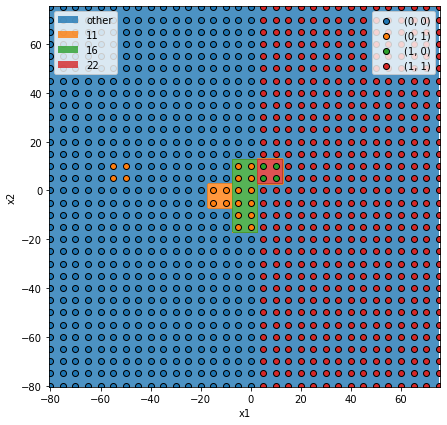

In [13]:
explain(max_depth=5)

(0, 1)
node #18: if (x1 > -7.5) and (x1 <= 2.5) and (x2 > -17.5) and (x2 <= 12.5) then class (0, 1) (covers 1.0 of 12 instances)
node #13: if (x1 > -17.5) and (x1 <= -7.5) and (x2 > -7.5) and (x2 <= 2.5) then class (0, 1) (covers 1.0 of 4 instances)
(1, 0)
node #24: if (x1 > 2.5) and (x1 <= 12.5) and (x2 > 2.5) and (x2 <= 12.5) then class (1, 0) (covers 1.0 of 4 instances)

data evaluation:
              precision    recall  f1-score   support

      (0, 0)       0.99      1.00      1.00       524
      (0, 1)       1.00      0.80      0.89        20
      (1, 0)       1.00      1.00      1.00         4
      (1, 1)       1.00      1.00      1.00       476

    accuracy                           1.00      1024
   macro avg       1.00      0.95      0.97      1024
weighted avg       1.00      1.00      1.00      1024



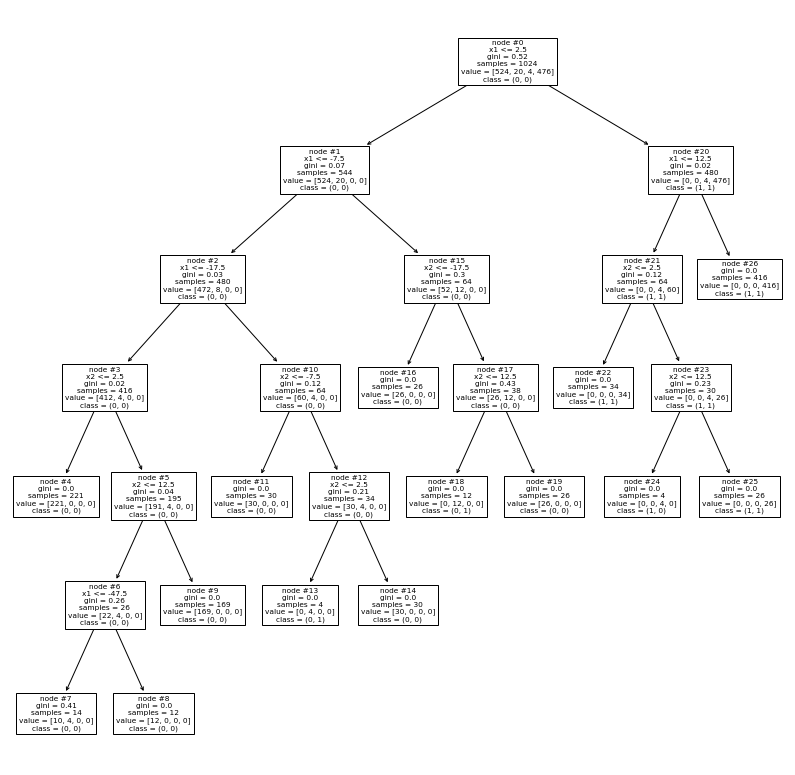

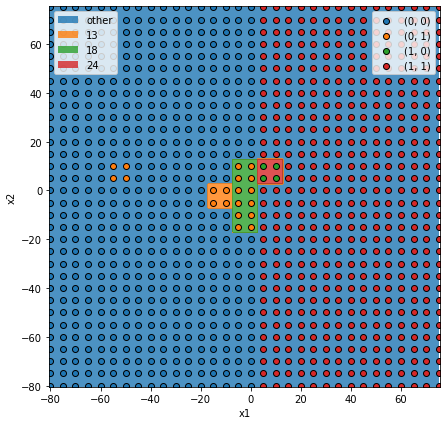

In [14]:
explain(max_depth=6)

(0, 1)
node #20: if (x1 > -7.5) and (x1 <= 2.5) and (x2 > -17.5) and (x2 <= 12.5) then class (0, 1) (covers 1.0 of 12 instances)
node #15: if (x1 > -17.5) and (x1 <= -7.5) and (x2 > -7.5) and (x2 <= 2.5) then class (0, 1) (covers 1.0 of 4 instances)
node #9: if (x1 > -57.5) and (x1 <= -47.5) and (x2 > 2.5) and (x2 <= 12.5) then class (0, 1) (covers 1.0 of 4 instances)
(1, 0)
node #26: if (x1 > 2.5) and (x1 <= 12.5) and (x2 > 2.5) and (x2 <= 12.5) then class (1, 0) (covers 1.0 of 4 instances)

data evaluation:
              precision    recall  f1-score   support

      (0, 0)       1.00      1.00      1.00       524
      (0, 1)       1.00      1.00      1.00        20
      (1, 0)       1.00      1.00      1.00         4
      (1, 1)       1.00      1.00      1.00       476

    accuracy                           1.00      1024
   macro avg       1.00      1.00      1.00      1024
weighted avg       1.00      1.00      1.00      1024



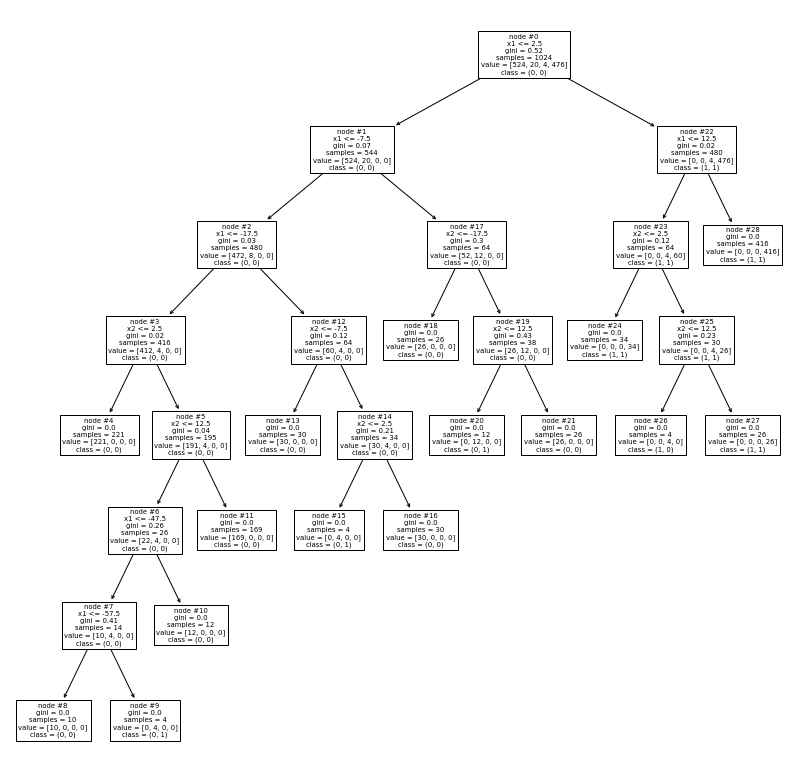

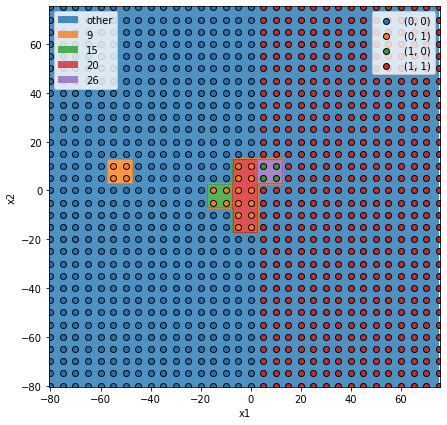

In [15]:
explain(max_depth=7)

### Fidelity
Every boundary differs by 2.5.

### Selectiveness
Best possible.

### Predictability
The explanation generalizes to all known differences.

### Persuability
This example shows the disadvantage of the global surrogate model: it can only be as accurate as the preciseness of the provided data set allows it. It is not able to determine the exact boundaries in between the instances. It might lead to false conclusions because of arbitrarily setting boundaries where no data instance exists.